In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [3]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [4]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [28]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,300,100)

Vizualize data

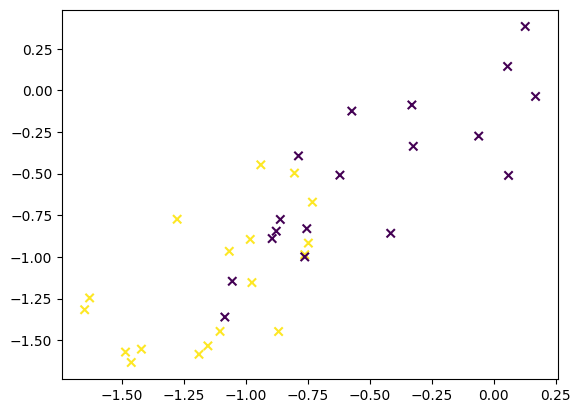

In [13]:
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(18,35).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [22]:
csp_test_classifiers(4,time_config, 35, 18)

(3, 0.4, 300, 100)


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/50
1/1 [==============================] - 1s 591ms/step - loss: 0.2996 - accuracy: 0.4800
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2970 - accuracy: 0.4800
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2943 - accuracy: 0.4800
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2917 - accuracy: 0.4800
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2891 - accuracy: 0.4800
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 0.4800
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2838 - accuracy: 0.4800
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2811 - accuracy: 0.4800
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2785 - accuracy: 0.4800
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2758 - accuracy: 0.4800
Epoch 11/50
1/1 [====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2749 - accuracy: 0.4000
Epoch 17/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2740 - accuracy: 0.4000
Epoch 18/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2732 - accuracy: 0.4000
Epoch 19/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2723 - accuracy: 0.4000
Epoch 20/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2715 - accuracy: 0.4000
Epoch 21/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2707 - accuracy: 0.4000
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.4000
Epoch 23/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2691 - accuracy: 0.4400
Epoch 24/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2683 - accuracy: 0.4800
Epoch 25/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2676 - accuracy: 0.4800
Epoch 26/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2293 - accuracy: 0.6400
Epoch 32/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.6400
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2250 - accuracy: 0.6400
Epoch 34/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2231 - accuracy: 0.7200
Epoch 35/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2212 - accuracy: 0.7200
Epoch 36/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2195 - accuracy: 0.7600
Epoch 37/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.8000
Epoch 38/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.8400
Epoch 39/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2142 - accuracy: 0.8400
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2125 - accuracy: 0.8400
Epoch 41/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2418 - accuracy: 0.4800
Epoch 47/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.4800
Epoch 48/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2378 - accuracy: 0.4800
Epoch 49/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2358 - accuracy: 0.4800
Epoch 50/50
1/1 [==============================] - 0s 111ms/step - loss: 0.2263 - accuracy: 0.5714
Epoch 1/50
1/1 [==============================] - 1s 523ms/step - loss: 0.1510 - accuracy: 0.9200
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1483 - accuracy: 0.9200
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1457 - accuracy: 0.9200
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1431 - accuracy: 0.9200
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1406 - accuracy: 0.9200
Epoch 6/50
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1582 - accuracy: 0.8000
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1571 - accuracy: 0.8400
Epoch 12/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1561 - accuracy: 0.8400
Epoch 13/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1550 - accuracy: 0.8800
Epoch 14/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1540 - accuracy: 0.8800
Epoch 15/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1530 - accuracy: 0.8800
Epoch 16/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1519 - accuracy: 0.8800
Epoch 17/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1509 - accuracy: 0.8800
Epoch 18/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1499 - accuracy: 0.8800
Epoch 19/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1489 - accuracy: 0.8800
Epoch 20/50
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.3120 - accuracy: 0.4400
Epoch 26/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3106 - accuracy: 0.4400
Epoch 27/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3093 - accuracy: 0.4400
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3079 - accuracy: 0.4400
Epoch 29/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.4400
Epoch 30/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3053 - accuracy: 0.4400
Epoch 31/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.4400
Epoch 32/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3026 - accuracy: 0.4400
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3012 - accuracy: 0.4400
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2999 - accuracy: 0.4400
Epoch 35/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.6000
Epoch 41/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2345 - accuracy: 0.6000
Epoch 42/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2318 - accuracy: 0.6400
Epoch 43/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.6400
Epoch 44/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.6400
Epoch 45/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.6400
Epoch 46/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2210 - accuracy: 0.6400
Epoch 47/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2182 - accuracy: 0.6400
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2156 - accuracy: 0.6400
Epoch 49/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2129 - accuracy: 0.6400
Epoch 50/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2036 - accuracy: 0.6000
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2016 - accuracy: 0.6000
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1996 - accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1977 - accuracy: 0.6000
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1957 - accuracy: 0.6000
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1938 - accuracy: 0.6400
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1918 - accuracy: 0.6400
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1898 - accuracy: 0.6800
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1878 - accuracy: 0.6800
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1858 - accuracy: 0.6800
Epoch 14/50
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.6000
Epoch 20/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2280 - accuracy: 0.6000
Epoch 21/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.6000
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2256 - accuracy: 0.6400
Epoch 23/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2243 - accuracy: 0.6800
Epoch 24/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2230 - accuracy: 0.7600
Epoch 25/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2218 - accuracy: 0.7600
Epoch 26/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2205 - accuracy: 0.7600
Epoch 27/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2192 - accuracy: 0.7600
Epoch 28/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2180 - accuracy: 0.7600
Epoch 29/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.1899 - accuracy: 0.8000
Epoch 35/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1884 - accuracy: 0.8000
Epoch 36/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1869 - accuracy: 0.8000
Epoch 37/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1855 - accuracy: 0.8000
Epoch 38/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1841 - accuracy: 0.8000
Epoch 39/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1826 - accuracy: 0.8000
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.8000
Epoch 41/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1798 - accuracy: 0.8000
Epoch 42/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1785 - accuracy: 0.8000
Epoch 43/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1771 - accuracy: 0.8000
Epoch 44/50
1/1 [=========================

Epoch 17/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2232 - accuracy: 0.6000
Epoch 18/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2214 - accuracy: 0.6000
Epoch 19/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2196 - accuracy: 0.6000
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2179 - accuracy: 0.6000
Epoch 21/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2162 - accuracy: 0.6000
Epoch 22/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2145 - accuracy: 0.6000
Epoch 23/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2128 - accuracy: 0.6000
Epoch 24/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2112 - accuracy: 0.6000
Epoch 25/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2096 - accuracy: 0.6400
Epoch 26/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2080 - accuracy: 0.6800
Epoch 27/50
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.3367 - accuracy: 0.4800
Epoch 33/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3336 - accuracy: 0.4800
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3303 - accuracy: 0.4800
Epoch 35/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3271 - accuracy: 0.4800
Epoch 36/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.4800
Epoch 37/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3205 - accuracy: 0.4800
Epoch 38/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3172 - accuracy: 0.4800
Epoch 39/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3139 - accuracy: 0.4800
Epoch 40/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.4800
Epoch 41/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3072 - accuracy: 0.4800
Epoch 42/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1411 - accuracy: 0.9200
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9200
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1385 - accuracy: 0.9200
Epoch 50/50
1/1 [==============================] - 0s 112ms/step - loss: 0.2149 - accuracy: 0.7143
Epoch 1/50
1/1 [==============================] - 1s 580ms/step - loss: 0.1571 - accuracy: 0.7600
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1543 - accuracy: 0.7600
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1515 - accuracy: 0.7600
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1488 - accuracy: 0.7600
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1461 - accuracy: 0.7600
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1435 - accuracy: 0.7600
Epoch 7/50
1/1 [============================

1/1 [==============================] - 0s 9ms/step - loss: 0.2711 - accuracy: 0.6000
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2698 - accuracy: 0.6000
Epoch 13/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2686 - accuracy: 0.6000
Epoch 14/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.6000
Epoch 15/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2660 - accuracy: 0.6000
Epoch 16/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2647 - accuracy: 0.6000
Epoch 17/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2635 - accuracy: 0.6000
Epoch 18/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.6000
Epoch 19/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.6000
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.6000
Epoch 21/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2689 - accuracy: 0.5600
Epoch 27/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2669 - accuracy: 0.5600
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2650 - accuracy: 0.5600
Epoch 29/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2631 - accuracy: 0.5600
Epoch 30/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2613 - accuracy: 0.5600
Epoch 31/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.5600
Epoch 32/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2574 - accuracy: 0.5600
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2556 - accuracy: 0.5600
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.5600
Epoch 35/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2519 - accuracy: 0.5600
Epoch 36/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1832 - accuracy: 0.7200
Epoch 42/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1815 - accuracy: 0.7200
Epoch 43/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1799 - accuracy: 0.8000
Epoch 44/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1783 - accuracy: 0.8000
Epoch 45/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1766 - accuracy: 0.8000
Epoch 46/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1750 - accuracy: 0.8000
Epoch 47/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1734 - accuracy: 0.8000
Epoch 48/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1719 - accuracy: 0.8000
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1703 - accuracy: 0.8000
Epoch 50/50
1/1 [==============================] - 0s 120ms/step - loss: 0.2494 - accuracy: 0.5714
Epoch 1/50
1/1 [========================

Epoch 24/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0904 - accuracy: 0.9200
Epoch 25/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0892 - accuracy: 0.9200
Epoch 26/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0881 - accuracy: 0.9200
Epoch 27/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9200
Epoch 28/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0860 - accuracy: 0.9200
Epoch 29/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0849 - accuracy: 0.9600
Epoch 30/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0839 - accuracy: 0.9600
Epoch 31/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0828 - accuracy: 0.9600
Epoch 32/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0817 - accuracy: 0.9600
Epoch 33/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0807 - accuracy: 0.9600
Epoch 34/50
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.5600
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2496 - accuracy: 0.5600
Epoch 41/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2479 - accuracy: 0.5600
Epoch 42/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.5600
Epoch 43/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.5600
Epoch 44/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.5600
Epoch 45/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2408 - accuracy: 0.5600
Epoch 46/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2390 - accuracy: 0.5600
Epoch 47/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2372 - accuracy: 0.5600
Epoch 48/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2355 - accuracy: 0.5600
Epoch 49/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2667 - accuracy: 0.3200
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2654 - accuracy: 0.3200
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.3200
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2627 - accuracy: 0.3600
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.4000
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.4000
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.4000
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2575 - accuracy: 0.4000
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2563 - accuracy: 0.4000
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.4400
Epoch 13/50
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3508 - accuracy: 0.4800
Epoch 19/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3487 - accuracy: 0.4800
Epoch 20/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3466 - accuracy: 0.4800
Epoch 21/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3445 - accuracy: 0.4800
Epoch 22/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3424 - accuracy: 0.4800
Epoch 23/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3403 - accuracy: 0.4800
Epoch 24/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3382 - accuracy: 0.4800
Epoch 25/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3360 - accuracy: 0.4800
Epoch 26/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.4800
Epoch 27/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3317 - accuracy: 0.4800
Epoch 28/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2152 - accuracy: 0.4800
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2136 - accuracy: 0.4800
Epoch 35/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2120 - accuracy: 0.4800
Epoch 36/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2104 - accuracy: 0.4800
Epoch 37/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2087 - accuracy: 0.4800
Epoch 38/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2070 - accuracy: 0.5200
Epoch 39/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2054 - accuracy: 0.5200
Epoch 40/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2037 - accuracy: 0.5200
Epoch 41/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2021 - accuracy: 0.5200
Epoch 42/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2004 - accuracy: 0.5200
Epoch 43/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.5600
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.5600
Epoch 50/50
1/1 [==============================] - 0s 116ms/step - loss: 0.3158 - accuracy: 0.5714
Epoch 1/50
1/1 [==============================] - 1s 520ms/step - loss: 0.3844 - accuracy: 0.5200
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3828 - accuracy: 0.5200
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3812 - accuracy: 0.5200
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3796 - accuracy: 0.5200
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3780 - accuracy: 0.5200
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3763 - accuracy: 0.5200
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3746 - accuracy: 0.5200
Epoch 8/50
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2946 - accuracy: 0.5600
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2926 - accuracy: 0.5600
Epoch 14/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2906 - accuracy: 0.5600
Epoch 15/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2885 - accuracy: 0.5600
Epoch 16/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2865 - accuracy: 0.5600
Epoch 17/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2845 - accuracy: 0.5600
Epoch 18/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2825 - accuracy: 0.5600
Epoch 19/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.6000
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.6000
Epoch 21/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2764 - accuracy: 0.6000
Epoch 22/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1954 - accuracy: 0.6000
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1939 - accuracy: 0.6000
Epoch 29/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.6000
Epoch 30/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1907 - accuracy: 0.6000
Epoch 31/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1892 - accuracy: 0.6000
Epoch 32/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1876 - accuracy: 0.6000
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.6000
Epoch 34/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1847 - accuracy: 0.6000
Epoch 35/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1833 - accuracy: 0.6000
Epoch 36/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1819 - accuracy: 0.6000
Epoch 37/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2653 - accuracy: 0.4400
Epoch 43/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.4800
Epoch 44/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2627 - accuracy: 0.4800
Epoch 45/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.4800
Epoch 46/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2602 - accuracy: 0.4800
Epoch 47/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2589 - accuracy: 0.4800
Epoch 48/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2577 - accuracy: 0.4800
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2564 - accuracy: 0.4800
Epoch 50/50
1/1 [==============================] - 0s 118ms/step - loss: 0.2823 - accuracy: 0.2857
Epoch 1/50
1/1 [==============================] - 1s 573ms/step - loss: 0.2696 - accuracy: 0.6000
Epoch 2/50
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.2236 - accuracy: 0.6800
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.6800
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2207 - accuracy: 0.6800
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2193 - accuracy: 0.7200
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2180 - accuracy: 0.7200
Epoch 11/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2166 - accuracy: 0.7200
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2153 - accuracy: 0.7200
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2139 - accuracy: 0.7200
Epoch 14/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2126 - accuracy: 0.7200
Epoch 15/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2112 - accuracy: 0.7200
Epoch 16/50
1/1 [============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3309 - accuracy: 0.4400
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3295 - accuracy: 0.4400
Epoch 23/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3280 - accuracy: 0.4400
Epoch 24/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3266 - accuracy: 0.4400
Epoch 25/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3251 - accuracy: 0.4400
Epoch 26/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3237 - accuracy: 0.4400
Epoch 27/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3222 - accuracy: 0.4400
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3208 - accuracy: 0.4400
Epoch 29/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3194 - accuracy: 0.4400
Epoch 30/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3180 - accuracy: 0.4400
Epoch 31/50
1/1 [=========================

1/1 [==============================] - 0s 8ms/step - loss: 0.1756 - accuracy: 0.6400
Epoch 37/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.6400
Epoch 38/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1715 - accuracy: 0.6400
Epoch 39/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1694 - accuracy: 0.6400
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1674 - accuracy: 0.6400
Epoch 41/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1654 - accuracy: 0.6800
Epoch 42/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1634 - accuracy: 0.7200
Epoch 43/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1615 - accuracy: 0.7200
Epoch 44/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1596 - accuracy: 0.7200
Epoch 45/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1576 - accuracy: 0.7200
Epoch 46/50
1/1 [=========================

1/1 [==============================] - 0s 118ms/step - loss: 0.3296 - accuracy: 0.2857
Epoch 1/50
1/1 [==============================] - 1s 518ms/step - loss: 0.2332 - accuracy: 0.5200
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2311 - accuracy: 0.5200
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2289 - accuracy: 0.5200
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2269 - accuracy: 0.5200
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2249 - accuracy: 0.5600
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.5600
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2209 - accuracy: 0.5600
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2190 - accuracy: 0.6000
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2171 - accuracy: 0.6000
Epoch 10/50
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2931 - accuracy: 0.3200
Epoch 16/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2902 - accuracy: 0.3600
Epoch 17/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.3600
Epoch 18/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.3600
Epoch 19/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2820 - accuracy: 0.3600
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2793 - accuracy: 0.3600
Epoch 21/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2766 - accuracy: 0.3600
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2740 - accuracy: 0.4000
Epoch 23/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2713 - accuracy: 0.4000
Epoch 24/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2687 - accuracy: 0.4000
Epoch 25/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.4000
Epoch 31/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.4000
Epoch 32/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4029 - accuracy: 0.4000
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3987 - accuracy: 0.4000
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3944 - accuracy: 0.4000
Epoch 35/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3902 - accuracy: 0.4000
Epoch 36/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3859 - accuracy: 0.3600
Epoch 37/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3816 - accuracy: 0.3600
Epoch 38/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3772 - accuracy: 0.3600
Epoch 39/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3728 - accuracy: 0.3600
Epoch 40/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2020 - accuracy: 0.7600
Epoch 46/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2008 - accuracy: 0.7600
Epoch 47/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1996 - accuracy: 0.7600
Epoch 48/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1983 - accuracy: 0.7600
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1970 - accuracy: 0.7600
Epoch 50/50
1/1 [==============================] - 0s 114ms/step - loss: 0.2554 - accuracy: 0.4286
Epoch 1/50
1/1 [==============================] - 1s 940ms/step - loss: 0.3410 - accuracy: 0.4000
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3383 - accuracy: 0.4000
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3357 - accuracy: 0.4000
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3331 - accuracy: 0.4400
Epoch 5/50
1/1 [==========================

In [29]:
dwt_test_classifiers(2,'db6',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/100
1/1 [==============================] - 1s 506ms/step - loss: 0.3528 - accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3513 - accuracy: 0.4000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3498 - accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3484 - accuracy: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3469 - accuracy: 0.4000
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3454 - accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3439 - accuracy: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3425 - accuracy: 0.4000
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3410 - accuracy: 0.4000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.4400
Epoch 11/100
1/1 [=========

1/1 [==============================] - 0s 6ms/step - loss: 0.2259 - accuracy: 0.6000
Epoch 67/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2249 - accuracy: 0.6000
Epoch 68/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.6000
Epoch 69/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.6000
Epoch 70/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2219 - accuracy: 0.6000
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2209 - accuracy: 0.6400
Epoch 72/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2199 - accuracy: 0.6400
Epoch 73/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2189 - accuracy: 0.6400
Epoch 74/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2179 - accuracy: 0.6400
Epoch 75/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2170 - accuracy: 0.6400
Epoch 76/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2084 - accuracy: 0.5600
Epoch 31/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2074 - accuracy: 0.5600
Epoch 32/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2065 - accuracy: 0.5600
Epoch 33/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.5600
Epoch 34/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.5600
Epoch 35/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2038 - accuracy: 0.5600
Epoch 36/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2028 - accuracy: 0.5600
Epoch 37/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2019 - accuracy: 0.6000
Epoch 38/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2010 - accuracy: 0.6000
Epoch 39/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2001 - accuracy: 0.6000
Epoch 40/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2522 - accuracy: 0.5600
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.5600
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2505 - accuracy: 0.5600
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.5600
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.6000
Epoch 100/100
1/1 [==============================] - 0s 115ms/step - loss: 0.3331 - accuracy: 0.4286
Epoch 1/100
1/1 [==============================] - 0s 494ms/step - loss: 0.2890 - accuracy: 0.5600
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.5600
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2857 - accuracy: 0.5600
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.6000
Epoch 5/100
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.1630 - accuracy: 0.8800
Epoch 60/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1619 - accuracy: 0.8800
Epoch 61/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1607 - accuracy: 0.8800
Epoch 62/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1596 - accuracy: 0.8800
Epoch 63/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1585 - accuracy: 0.8800
Epoch 64/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1574 - accuracy: 0.8800
Epoch 65/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1563 - accuracy: 0.8800
Epoch 66/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1552 - accuracy: 0.8800
Epoch 67/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1541 - accuracy: 0.8800
Epoch 68/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1531 - accuracy: 0.8800
Epoch 69/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2652 - accuracy: 0.5200
Epoch 24/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.5200
Epoch 25/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2637 - accuracy: 0.5200
Epoch 26/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2630 - accuracy: 0.5200
Epoch 27/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2623 - accuracy: 0.5200
Epoch 28/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2615 - accuracy: 0.5200
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.5200
Epoch 30/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.5200
Epoch 31/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2593 - accuracy: 0.5200
Epoch 32/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2586 - accuracy: 0.5200
Epoch 33/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1565 - accuracy: 0.8400
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1559 - accuracy: 0.8400
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1552 - accuracy: 0.8800
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1546 - accuracy: 0.8800
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1539 - accuracy: 0.8800
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1533 - accuracy: 0.8800
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1526 - accuracy: 0.8800
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1520 - accuracy: 0.8800
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1514 - accuracy: 0.8800
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1507 - accuracy: 0.8800
Epoch 98/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.5600
Epoch 53/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.5600
Epoch 54/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3167 - accuracy: 0.5600
Epoch 55/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3155 - accuracy: 0.5600
Epoch 56/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3143 - accuracy: 0.5600
Epoch 57/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.5600
Epoch 58/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3120 - accuracy: 0.5600
Epoch 59/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3108 - accuracy: 0.5600
Epoch 60/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.5600
Epoch 61/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3085 - accuracy: 0.5600
Epoch 62/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2529 - accuracy: 0.6800
Epoch 17/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.6800
Epoch 18/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2505 - accuracy: 0.6800
Epoch 19/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.6800
Epoch 20/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2482 - accuracy: 0.6800
Epoch 21/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.6800
Epoch 22/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.6800
Epoch 23/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.6800
Epoch 24/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2436 - accuracy: 0.6800
Epoch 25/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2424 - accuracy: 0.6800
Epoch 26/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1768 - accuracy: 0.6800
Epoch 82/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1757 - accuracy: 0.6800
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1746 - accuracy: 0.6800
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.6800
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1724 - accuracy: 0.6800
Epoch 86/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1713 - accuracy: 0.7200
Epoch 87/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1702 - accuracy: 0.7200
Epoch 88/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1691 - accuracy: 0.7200
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1680 - accuracy: 0.7200
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1669 - accuracy: 0.7200
Epoch 91/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2173 - accuracy: 0.6800
Epoch 46/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2158 - accuracy: 0.6800
Epoch 47/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2144 - accuracy: 0.6800
Epoch 48/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2129 - accuracy: 0.7200
Epoch 49/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2114 - accuracy: 0.7200
Epoch 50/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2100 - accuracy: 0.7200
Epoch 51/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2086 - accuracy: 0.7200
Epoch 52/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2071 - accuracy: 0.7200
Epoch 53/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.7200
Epoch 54/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2043 - accuracy: 0.7200
Epoch 55/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.4400
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2990 - accuracy: 0.4400
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.4400
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2970 - accuracy: 0.4400
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2960 - accuracy: 0.4800
Epoch 14/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2950 - accuracy: 0.4800
Epoch 15/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.4800
Epoch 16/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.4800
Epoch 17/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2921 - accuracy: 0.4800
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2911 - accuracy: 0.4800
Epoch 19/100
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.1947 - accuracy: 0.8000
Epoch 75/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1937 - accuracy: 0.8000
Epoch 76/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1928 - accuracy: 0.8000
Epoch 77/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1919 - accuracy: 0.8000
Epoch 78/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1909 - accuracy: 0.8000
Epoch 79/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1900 - accuracy: 0.8000
Epoch 80/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1891 - accuracy: 0.8000
Epoch 81/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1882 - accuracy: 0.8000
Epoch 82/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1872 - accuracy: 0.8000
Epoch 83/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1863 - accuracy: 0.8400
Epoch 84/100
1/1 [============

1/1 [==============================] - 0s 5ms/step - loss: 0.2183 - accuracy: 0.6800
Epoch 39/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.6800
Epoch 40/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2162 - accuracy: 0.6800
Epoch 41/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2152 - accuracy: 0.6800
Epoch 42/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2141 - accuracy: 0.6800
Epoch 43/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2131 - accuracy: 0.6800
Epoch 44/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2121 - accuracy: 0.6800
Epoch 45/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2110 - accuracy: 0.6800
Epoch 46/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2100 - accuracy: 0.6800
Epoch 47/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2090 - accuracy: 0.6800
Epoch 48/100
1/1 [===============

1/1 [==============================] - 0s 19ms/step - loss: 0.3029 - accuracy: 0.4400
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3017 - accuracy: 0.4400
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3005 - accuracy: 0.4400
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2993 - accuracy: 0.4400
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2981 - accuracy: 0.4400
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2970 - accuracy: 0.4400
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2958 - accuracy: 0.4400
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2946 - accuracy: 0.4400
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2934 - accuracy: 0.4800
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.4800
Epoch 12/100
1/1 [================

1/1 [==============================] - 0s 5ms/step - loss: 0.1870 - accuracy: 0.7200
Epoch 68/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1863 - accuracy: 0.7200
Epoch 69/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1856 - accuracy: 0.7200
Epoch 70/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1848 - accuracy: 0.7200
Epoch 71/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1841 - accuracy: 0.7200
Epoch 72/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1834 - accuracy: 0.7200
Epoch 73/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1826 - accuracy: 0.7200
Epoch 74/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1819 - accuracy: 0.7200
Epoch 75/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.7200
Epoch 76/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1804 - accuracy: 0.7200
Epoch 77/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2129 - accuracy: 0.6400
Epoch 32/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2118 - accuracy: 0.6400
Epoch 33/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2108 - accuracy: 0.6400
Epoch 34/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2097 - accuracy: 0.6400
Epoch 35/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2087 - accuracy: 0.6800
Epoch 36/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2077 - accuracy: 0.6800
Epoch 37/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2066 - accuracy: 0.6800
Epoch 38/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2056 - accuracy: 0.6800
Epoch 39/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2046 - accuracy: 0.6800
Epoch 40/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2036 - accuracy: 0.6800
Epoch 41/100
1/1 [==========

1/1 [==============================] - 0s 6ms/step - loss: 0.1522 - accuracy: 0.8400
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1515 - accuracy: 0.8400
Epoch 98/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1507 - accuracy: 0.8400
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1500 - accuracy: 0.8400
Epoch 100/100
1/1 [==============================] - 0s 150ms/step - loss: 0.2085 - accuracy: 0.7143
Epoch 1/100
1/1 [==============================] - 1s 545ms/step - loss: 0.3676 - accuracy: 0.2800
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3657 - accuracy: 0.2800
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3638 - accuracy: 0.2800
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3619 - accuracy: 0.2800
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3601 - accuracy: 0.2800
Epoch 6/100
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.7600
Epoch 61/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2114 - accuracy: 0.7600
Epoch 62/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2105 - accuracy: 0.7600
Epoch 63/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2096 - accuracy: 0.7600
Epoch 64/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2087 - accuracy: 0.8000
Epoch 65/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2079 - accuracy: 0.8000
Epoch 66/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2070 - accuracy: 0.8000
Epoch 67/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2061 - accuracy: 0.8000
Epoch 68/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2053 - accuracy: 0.8000
Epoch 69/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2044 - accuracy: 0.8000
Epoch 70/100
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 0.2653 - accuracy: 0.5600
Epoch 25/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2644 - accuracy: 0.5600
Epoch 26/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2636 - accuracy: 0.5600
Epoch 27/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2627 - accuracy: 0.5600
Epoch 28/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2618 - accuracy: 0.5600
Epoch 29/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2610 - accuracy: 0.5600
Epoch 30/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2602 - accuracy: 0.5600
Epoch 31/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2593 - accuracy: 0.5600
Epoch 32/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.5600
Epoch 33/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2576 - accuracy: 0.5600
Epoch 34/100
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 0.1918 - accuracy: 0.6800
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1909 - accuracy: 0.6800
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1899 - accuracy: 0.6800
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1890 - accuracy: 0.6800
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1880 - accuracy: 0.6800
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1871 - accuracy: 0.6800
Epoch 95/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1862 - accuracy: 0.6800
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1852 - accuracy: 0.6800
Epoch 97/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1843 - accuracy: 0.6800
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1834 - accuracy: 0.6800
Epoch 99/100
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 0.2856 - accuracy: 0.5200
Epoch 54/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2844 - accuracy: 0.5200
Epoch 55/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2833 - accuracy: 0.5200
Epoch 56/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2821 - accuracy: 0.5200
Epoch 57/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2809 - accuracy: 0.5600
Epoch 58/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2798 - accuracy: 0.5600
Epoch 59/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2786 - accuracy: 0.5600
Epoch 60/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2775 - accuracy: 0.5600
Epoch 61/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2764 - accuracy: 0.5600
Epoch 62/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2752 - accuracy: 0.5600
Epoch 63/100
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.2301 - accuracy: 0.6400
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2288 - accuracy: 0.6400
Epoch 19/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2275 - accuracy: 0.6400
Epoch 20/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.6400
Epoch 21/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2249 - accuracy: 0.6400
Epoch 22/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.6400
Epoch 23/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.6400
Epoch 24/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2210 - accuracy: 0.6400
Epoch 25/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2197 - accuracy: 0.6400
Epoch 26/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.6400
Epoch 27/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2287 - accuracy: 0.5600
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2277 - accuracy: 0.6400
Epoch 84/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2267 - accuracy: 0.6400
Epoch 85/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2257 - accuracy: 0.6400
Epoch 86/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2247 - accuracy: 0.6400
Epoch 87/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2238 - accuracy: 0.6400
Epoch 88/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2228 - accuracy: 0.6400
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2218 - accuracy: 0.6400
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2208 - accuracy: 0.6400
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2198 - accuracy: 0.6400
Epoch 92/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.4000
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2849 - accuracy: 0.4000
Epoch 48/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2833 - accuracy: 0.4000
Epoch 49/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2816 - accuracy: 0.4000
Epoch 50/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.4000
Epoch 51/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2783 - accuracy: 0.4000
Epoch 52/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2766 - accuracy: 0.4000
Epoch 53/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2750 - accuracy: 0.4000
Epoch 54/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2734 - accuracy: 0.4000
Epoch 55/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2717 - accuracy: 0.4000
Epoch 56/100
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 0.3330 - accuracy: 0.4000
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3313 - accuracy: 0.4000
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3296 - accuracy: 0.4000
Epoch 13/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3279 - accuracy: 0.4000
Epoch 14/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3263 - accuracy: 0.4000
Epoch 15/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3246 - accuracy: 0.4000
Epoch 16/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3230 - accuracy: 0.4000
Epoch 17/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3214 - accuracy: 0.4000
Epoch 18/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3198 - accuracy: 0.4000
Epoch 19/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3182 - accuracy: 0.4000
Epoch 20/100
1/1 [============

1/1 [==============================] - 0s 5ms/step - loss: 0.1232 - accuracy: 0.9200
Epoch 76/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1222 - accuracy: 0.9200
Epoch 77/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1212 - accuracy: 0.9200
Epoch 78/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1202 - accuracy: 0.9200
Epoch 79/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1192 - accuracy: 0.9200
Epoch 80/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1183 - accuracy: 0.9200
Epoch 81/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1173 - accuracy: 0.9200
Epoch 82/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1164 - accuracy: 0.9600
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1155 - accuracy: 0.9600
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1147 - accuracy: 0.9600
Epoch 85/100
1/1 [===============

1/1 [==============================] - 0s 15ms/step - loss: 0.3353 - accuracy: 0.4400
Epoch 40/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3338 - accuracy: 0.4400
Epoch 41/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3323 - accuracy: 0.4400
Epoch 42/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3307 - accuracy: 0.4400
Epoch 43/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3292 - accuracy: 0.4400
Epoch 44/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3277 - accuracy: 0.4400
Epoch 45/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3262 - accuracy: 0.4400
Epoch 46/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3246 - accuracy: 0.4400
Epoch 47/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3231 - accuracy: 0.4400
Epoch 48/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3215 - accuracy: 0.4400
Epoch 49/100
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.3356 - accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3344 - accuracy: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3333 - accuracy: 0.4000
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3322 - accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3310 - accuracy: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3299 - accuracy: 0.4000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3287 - accuracy: 0.4000
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3276 - accuracy: 0.4000
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3265 - accuracy: 0.4000
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3254 - accuracy: 0.4000
Epoch 13/100
1/1 [=====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2536 - accuracy: 0.5600
Epoch 69/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2521 - accuracy: 0.5600
Epoch 70/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.5600
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.5600
Epoch 72/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2476 - accuracy: 0.6400
Epoch 73/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.6400
Epoch 74/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.6400
Epoch 75/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2432 - accuracy: 0.6400
Epoch 76/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2417 - accuracy: 0.6400
Epoch 77/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2403 - accuracy: 0.6400
Epoch 78/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2659 - accuracy: 0.6000
Epoch 33/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.6000
Epoch 34/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2631 - accuracy: 0.6000
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.6000
Epoch 36/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.6000
Epoch 37/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.6000
Epoch 38/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2576 - accuracy: 0.6000
Epoch 39/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2563 - accuracy: 0.6000
Epoch 40/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.6000
Epoch 41/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.6000
Epoch 42/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1504 - accuracy: 0.7600
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1494 - accuracy: 0.7600
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1484 - accuracy: 0.7600
Epoch 100/100
1/1 [==============================] - 0s 110ms/step - loss: 0.1714 - accuracy: 0.8571
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.2570 - accuracy: 0.5600
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2557 - accuracy: 0.5600
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2544 - accuracy: 0.5600
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2531 - accuracy: 0.5600
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2519 - accuracy: 0.5600
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2506 - accuracy: 0.5600
Epoch 7/100
1/1 [===================

1/1 [==============================] - 0s 6ms/step - loss: 0.1700 - accuracy: 0.8000
Epoch 62/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1691 - accuracy: 0.8000
Epoch 63/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1681 - accuracy: 0.8000
Epoch 64/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1672 - accuracy: 0.8000
Epoch 65/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1662 - accuracy: 0.8400
Epoch 66/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1653 - accuracy: 0.8400
Epoch 67/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1643 - accuracy: 0.8400
Epoch 68/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1634 - accuracy: 0.8400
Epoch 69/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1624 - accuracy: 0.8400
Epoch 70/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1615 - accuracy: 0.8400
Epoch 71/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3439 - accuracy: 0.4800
Epoch 26/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3424 - accuracy: 0.4800
Epoch 27/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3408 - accuracy: 0.4800
Epoch 28/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3392 - accuracy: 0.4800
Epoch 29/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.4800
Epoch 30/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3360 - accuracy: 0.4800
Epoch 31/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.4800
Epoch 32/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.4800
Epoch 33/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3313 - accuracy: 0.4800
Epoch 34/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3297 - accuracy: 0.4800
Epoch 35/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2070 - accuracy: 0.7600
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2063 - accuracy: 0.7600
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.7600
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2051 - accuracy: 0.7600
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2045 - accuracy: 0.7600
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2039 - accuracy: 0.7600
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2033 - accuracy: 0.7600
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2028 - accuracy: 0.8000
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2022 - accuracy: 0.8000
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2016 - accuracy: 0.8000
Epoch 100/100
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.2000 - accuracy: 0.7200
Epoch 55/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1987 - accuracy: 0.7200
Epoch 56/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1974 - accuracy: 0.7200
Epoch 57/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1961 - accuracy: 0.7200
Epoch 58/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1948 - accuracy: 0.7200
Epoch 59/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1935 - accuracy: 0.7200
Epoch 60/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.7200
Epoch 61/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1910 - accuracy: 0.7200
Epoch 62/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1897 - accuracy: 0.7200
Epoch 63/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1885 - accuracy: 0.7200
Epoch 64/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1998 - accuracy: 0.6800
Epoch 19/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1987 - accuracy: 0.6800
Epoch 20/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1975 - accuracy: 0.6800
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1964 - accuracy: 0.6800
Epoch 22/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1952 - accuracy: 0.6800
Epoch 23/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1941 - accuracy: 0.6800
Epoch 24/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1930 - accuracy: 0.6800
Epoch 25/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1918 - accuracy: 0.6800
Epoch 26/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1908 - accuracy: 0.6800
Epoch 27/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1897 - accuracy: 0.6800
Epoch 28/100
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.2324 - accuracy: 0.7200
Epoch 84/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.7200
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2299 - accuracy: 0.7200
Epoch 86/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.7200
Epoch 87/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2274 - accuracy: 0.7200
Epoch 88/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2261 - accuracy: 0.7200
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2248 - accuracy: 0.7200
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2235 - accuracy: 0.7200
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2223 - accuracy: 0.7200
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2210 - accuracy: 0.7200
Epoch 93/100
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.2504 - accuracy: 0.6000
Epoch 48/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.6000
Epoch 49/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.6000
Epoch 50/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.6000
Epoch 51/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.6000
Epoch 52/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2432 - accuracy: 0.6000
Epoch 53/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2418 - accuracy: 0.6000
Epoch 54/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2404 - accuracy: 0.6000
Epoch 55/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2390 - accuracy: 0.6000
Epoch 56/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2376 - accuracy: 0.6000
Epoch 57/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.3233 - accuracy: 0.3600
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3213 - accuracy: 0.3600
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3193 - accuracy: 0.3600
Epoch 14/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.3600
Epoch 15/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3154 - accuracy: 0.3600
Epoch 16/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.3600
Epoch 17/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3115 - accuracy: 0.3600
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3096 - accuracy: 0.3600
Epoch 19/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3076 - accuracy: 0.3600
Epoch 20/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.3600
Epoch 21/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2315 - accuracy: 0.6000
Epoch 77/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2302 - accuracy: 0.6400
Epoch 78/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2289 - accuracy: 0.6400
Epoch 79/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2276 - accuracy: 0.6400
Epoch 80/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2264 - accuracy: 0.6400
Epoch 81/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2251 - accuracy: 0.6400
Epoch 82/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.6400
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2226 - accuracy: 0.6400
Epoch 84/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.6400
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2201 - accuracy: 0.6400
Epoch 86/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1812 - accuracy: 0.8000
Epoch 41/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1800 - accuracy: 0.8000
Epoch 42/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1788 - accuracy: 0.8000
Epoch 43/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1777 - accuracy: 0.8000
Epoch 44/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1766 - accuracy: 0.8000
Epoch 45/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1754 - accuracy: 0.8000
Epoch 46/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1743 - accuracy: 0.8000
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1732 - accuracy: 0.8400
Epoch 48/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1721 - accuracy: 0.8400
Epoch 49/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1710 - accuracy: 0.8400
Epoch 50/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3267 - accuracy: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3248 - accuracy: 0.4000
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3230 - accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3212 - accuracy: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3194 - accuracy: 0.4000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3175 - accuracy: 0.4000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3157 - accuracy: 0.4000
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.4000
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3121 - accuracy: 0.4000
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.4000
Epoch 14/100
1/1 [====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2023 - accuracy: 0.7200
Epoch 70/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2012 - accuracy: 0.7200
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.7200
Epoch 72/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1992 - accuracy: 0.7200
Epoch 73/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1981 - accuracy: 0.7600
Epoch 74/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.7600
Epoch 75/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1961 - accuracy: 0.7600
Epoch 76/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1951 - accuracy: 0.7600
Epoch 77/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1940 - accuracy: 0.7600
Epoch 78/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1930 - accuracy: 0.7600
Epoch 79/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2104 - accuracy: 0.6400
Epoch 34/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2089 - accuracy: 0.6400
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2075 - accuracy: 0.6400
Epoch 36/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2061 - accuracy: 0.6400
Epoch 37/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2046 - accuracy: 0.6400
Epoch 38/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2032 - accuracy: 0.6400
Epoch 39/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2018 - accuracy: 0.6400
Epoch 40/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2004 - accuracy: 0.6400
Epoch 41/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1990 - accuracy: 0.6400
Epoch 42/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1976 - accuracy: 0.6400
Epoch 43/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1458 - accuracy: 0.8800
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1449 - accuracy: 0.8800
Epoch 100/100
1/1 [==============================] - 0s 117ms/step - loss: 0.2496 - accuracy: 0.5714
Epoch 1/100
1/1 [==============================] - 1s 509ms/step - loss: 0.2580 - accuracy: 0.4800
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2565 - accuracy: 0.5200
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2550 - accuracy: 0.5600
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2535 - accuracy: 0.5600
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2520 - accuracy: 0.5600
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2505 - accuracy: 0.5600
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.5600
Epoch 8/100
1/1 [==================

1/1 [==============================] - 0s 6ms/step - loss: 0.2363 - accuracy: 0.6400
Epoch 63/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2350 - accuracy: 0.6400
Epoch 64/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2337 - accuracy: 0.6400
Epoch 65/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2325 - accuracy: 0.6400
Epoch 66/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2312 - accuracy: 0.6400
Epoch 67/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2300 - accuracy: 0.6400
Epoch 68/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2287 - accuracy: 0.6400
Epoch 69/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2275 - accuracy: 0.6400
Epoch 70/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2262 - accuracy: 0.6400
Epoch 71/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2250 - accuracy: 0.6400
Epoch 72/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.4000
Epoch 27/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2826 - accuracy: 0.4400
Epoch 28/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.4400
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2798 - accuracy: 0.4400
Epoch 30/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.4800
Epoch 31/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2771 - accuracy: 0.4800
Epoch 32/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.4800
Epoch 33/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.4800
Epoch 34/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2730 - accuracy: 0.4800
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2716 - accuracy: 0.4800
Epoch 36/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2009 - accuracy: 0.7600
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1998 - accuracy: 0.7600
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1987 - accuracy: 0.7600
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1977 - accuracy: 0.7600
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1966 - accuracy: 0.7600
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1956 - accuracy: 0.7600
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1945 - accuracy: 0.7600
Epoch 98/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1935 - accuracy: 0.7600
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1925 - accuracy: 0.7600
Epoch 100/100
1/1 [==============================] - 0s 115ms/step - loss: 0.1914 - accuracy: 0.7143
Epoch 1/100
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.2185 - accuracy: 0.6400
Epoch 56/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2172 - accuracy: 0.6400
Epoch 57/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2160 - accuracy: 0.6400
Epoch 58/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2147 - accuracy: 0.6800
Epoch 59/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2135 - accuracy: 0.6800
Epoch 60/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2122 - accuracy: 0.6800
Epoch 61/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2110 - accuracy: 0.6800
Epoch 62/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2097 - accuracy: 0.6800
Epoch 63/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2085 - accuracy: 0.6800
Epoch 64/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2073 - accuracy: 0.6800
Epoch 65/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1797 - accuracy: 0.8000
Epoch 20/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1785 - accuracy: 0.8000
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1773 - accuracy: 0.8000
Epoch 22/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1761 - accuracy: 0.8000
Epoch 23/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1749 - accuracy: 0.8000
Epoch 24/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1737 - accuracy: 0.8000
Epoch 25/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1726 - accuracy: 0.8000
Epoch 26/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1714 - accuracy: 0.8000
Epoch 27/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1702 - accuracy: 0.8000
Epoch 28/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1691 - accuracy: 0.8000
Epoch 29/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1311 - accuracy: 0.8400
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1301 - accuracy: 0.8400
Epoch 86/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1292 - accuracy: 0.8400
Epoch 87/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.8400
Epoch 88/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.8400
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1262 - accuracy: 0.8400
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1253 - accuracy: 0.8400
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.8800
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1234 - accuracy: 0.8800
Epoch 93/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1225 - accuracy: 0.8800
Epoch 94/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2180 - accuracy: 0.5600
Epoch 49/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2165 - accuracy: 0.6000
Epoch 50/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2150 - accuracy: 0.6000
Epoch 51/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2135 - accuracy: 0.6000
Epoch 52/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2120 - accuracy: 0.6000
Epoch 53/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2105 - accuracy: 0.6000
Epoch 54/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2090 - accuracy: 0.6000
Epoch 55/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2075 - accuracy: 0.6000
Epoch 56/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2060 - accuracy: 0.6400
Epoch 57/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2045 - accuracy: 0.6400
Epoch 58/100
1/1 [============

1/1 [==============================] - 0s 6ms/step - loss: 0.2574 - accuracy: 0.6400
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.6400
Epoch 14/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2555 - accuracy: 0.6400
Epoch 15/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2546 - accuracy: 0.6800
Epoch 16/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.6800
Epoch 17/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2528 - accuracy: 0.6800
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2519 - accuracy: 0.6800
Epoch 19/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2510 - accuracy: 0.6800
Epoch 20/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.6800
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2492 - accuracy: 0.6800
Epoch 22/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1680 - accuracy: 0.8000
Epoch 78/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1669 - accuracy: 0.8000
Epoch 79/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1659 - accuracy: 0.8400
Epoch 80/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1648 - accuracy: 0.8400
Epoch 81/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1638 - accuracy: 0.8400
Epoch 82/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1627 - accuracy: 0.8400
Epoch 83/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1617 - accuracy: 0.8400
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1607 - accuracy: 0.8400
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1596 - accuracy: 0.8400
Epoch 86/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1586 - accuracy: 0.8400
Epoch 87/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2075 - accuracy: 0.6800
Epoch 42/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2066 - accuracy: 0.6800
Epoch 43/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.6800
Epoch 44/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2047 - accuracy: 0.6800
Epoch 45/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2037 - accuracy: 0.6800
Epoch 46/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2027 - accuracy: 0.7200
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2018 - accuracy: 0.7200
Epoch 48/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2008 - accuracy: 0.7200
Epoch 49/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1999 - accuracy: 0.7200
Epoch 50/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1989 - accuracy: 0.7200
Epoch 51/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3188 - accuracy: 0.4000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.4000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3129 - accuracy: 0.4000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.4000
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3102 - accuracy: 0.4000
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3088 - accuracy: 0.4000
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.4000
Epoch 14/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3061 - accuracy: 0.4000
Epoch 15/100
1/1 [===================

1/1 [==============================] - 0s 5ms/step - loss: 0.2325 - accuracy: 0.6400
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2314 - accuracy: 0.6400
Epoch 72/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2304 - accuracy: 0.6400
Epoch 73/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2294 - accuracy: 0.6800
Epoch 74/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2283 - accuracy: 0.6800
Epoch 75/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.6800
Epoch 76/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2263 - accuracy: 0.6800
Epoch 77/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2254 - accuracy: 0.6800
Epoch 78/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2244 - accuracy: 0.6800
Epoch 79/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.6800
Epoch 80/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.6400
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2302 - accuracy: 0.6400
Epoch 36/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2292 - accuracy: 0.6400
Epoch 37/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2283 - accuracy: 0.6400
Epoch 38/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2274 - accuracy: 0.6400
Epoch 39/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.6400
Epoch 40/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.6400
Epoch 41/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2247 - accuracy: 0.6400
Epoch 42/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.6400
Epoch 43/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2228 - accuracy: 0.6400
Epoch 44/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1995 - accuracy: 0.6400
Epoch 100/100
1/1 [==============================] - 0s 113ms/step - loss: 0.3093 - accuracy: 0.4286
Epoch 1/100
1/1 [==============================] - 1s 507ms/step - loss: 0.2610 - accuracy: 0.6000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2595 - accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2581 - accuracy: 0.6000
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2567 - accuracy: 0.6000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.6000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2538 - accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2524 - accuracy: 0.6400
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2510 - accuracy: 0.6400
Epoch 9/100
1/1 [===================

1/1 [==============================] - 0s 5ms/step - loss: 0.2292 - accuracy: 0.6000
Epoch 64/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.6000
Epoch 65/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2277 - accuracy: 0.6000
Epoch 66/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2270 - accuracy: 0.6000
Epoch 67/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2263 - accuracy: 0.6000
Epoch 68/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2255 - accuracy: 0.6000
Epoch 69/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2248 - accuracy: 0.6000
Epoch 70/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2241 - accuracy: 0.6000
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2234 - accuracy: 0.6000
Epoch 72/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2227 - accuracy: 0.6000
Epoch 73/100
1/1 [===============

left vs right

In [30]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (1,0.2,1000,0)

In [20]:
csp_test_classifiers(4,time_config, 60, 35)

(1, 0.2, 1000, 0)


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/50
1/1 [==============================] - 1s 549ms/step - loss: 0.2333 - accuracy: 0.6786
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2331 - accuracy: 0.6786
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.6786
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2327 - accuracy: 0.6786
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2325 - accuracy: 0.6786
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2323 - accuracy: 0.6786
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2321 - accuracy: 0.6786
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2319 - accuracy: 0.6786
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 0.6786
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2315 - accuracy: 0.6786
Epoch 11/50
1/1 [====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2427 - accuracy: 0.7143
Epoch 17/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2424 - accuracy: 0.6786
Epoch 18/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2421 - accuracy: 0.6786
Epoch 19/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2418 - accuracy: 0.6786
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2415 - accuracy: 0.6786
Epoch 21/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2411 - accuracy: 0.6786
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2408 - accuracy: 0.6786
Epoch 23/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2405 - accuracy: 0.6786
Epoch 24/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2402 - accuracy: 0.6786
Epoch 25/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2399 - accuracy: 0.6786
Epoch 26/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2542 - accuracy: 0.5357
Epoch 32/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2536 - accuracy: 0.5357
Epoch 33/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2531 - accuracy: 0.5357
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2525 - accuracy: 0.5357
Epoch 35/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2519 - accuracy: 0.5357
Epoch 36/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.5357
Epoch 37/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2508 - accuracy: 0.5357
Epoch 38/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2502 - accuracy: 0.5357
Epoch 39/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2496 - accuracy: 0.5357
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.5357
Epoch 41/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2283 - accuracy: 0.6071
Epoch 47/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2281 - accuracy: 0.6071
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2279 - accuracy: 0.6071
Epoch 49/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2277 - accuracy: 0.6071
Epoch 50/50
1/1 [==============================] - 0s 109ms/step - loss: 0.2307 - accuracy: 0.6250
Epoch 1/50
1/1 [==============================] - 1s 506ms/step - loss: 0.2145 - accuracy: 0.5357
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2140 - accuracy: 0.6071
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2135 - accuracy: 0.6071
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2130 - accuracy: 0.6071
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2125 - accuracy: 0.6071
Epoch 6/50
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1831 - accuracy: 0.7500
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1828 - accuracy: 0.7500
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1825 - accuracy: 0.7500
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1822 - accuracy: 0.7500
Epoch 14/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1819 - accuracy: 0.7500
Epoch 15/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1816 - accuracy: 0.7500
Epoch 16/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1813 - accuracy: 0.7500
Epoch 17/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1810 - accuracy: 0.7500
Epoch 18/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1807 - accuracy: 0.7500
Epoch 19/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1804 - accuracy: 0.7500
Epoch 20/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2061 - accuracy: 0.7500
Epoch 26/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2060 - accuracy: 0.7500
Epoch 27/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2059 - accuracy: 0.7500
Epoch 28/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2058 - accuracy: 0.7500
Epoch 29/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.7500
Epoch 30/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.7500
Epoch 31/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2055 - accuracy: 0.7857
Epoch 32/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2054 - accuracy: 0.7857
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2053 - accuracy: 0.7857
Epoch 34/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2052 - accuracy: 0.7857
Epoch 35/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.1954 - accuracy: 0.7143
Epoch 41/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1952 - accuracy: 0.7143
Epoch 42/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1950 - accuracy: 0.7143
Epoch 43/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1949 - accuracy: 0.7143
Epoch 44/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1947 - accuracy: 0.7143
Epoch 45/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1945 - accuracy: 0.7143
Epoch 46/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1943 - accuracy: 0.7143
Epoch 47/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 0.7143
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1940 - accuracy: 0.7143
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1938 - accuracy: 0.7143
Epoch 50/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3167 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3155 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3148 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3136 - accuracy: 0.5000
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3130 - accuracy: 0.5000
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3124 - accuracy: 0.5000
Epoch 13/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3118 - accuracy: 0.5000
Epoch 14/50
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.5000
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2728 - accuracy: 0.5000
Epoch 21/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2723 - accuracy: 0.5000
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.5000
Epoch 23/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2713 - accuracy: 0.5357
Epoch 24/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2709 - accuracy: 0.5357
Epoch 25/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2704 - accuracy: 0.5357
Epoch 26/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2699 - accuracy: 0.5357
Epoch 27/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2694 - accuracy: 0.5357
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2689 - accuracy: 0.5357
Epoch 29/50
1/1 [========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2232 - accuracy: 0.8214
Epoch 35/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2227 - accuracy: 0.8214
Epoch 36/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.8214
Epoch 37/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2217 - accuracy: 0.8214
Epoch 38/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2212 - accuracy: 0.8214
Epoch 39/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2207 - accuracy: 0.8214
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.8214
Epoch 41/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2197 - accuracy: 0.8214
Epoch 42/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2192 - accuracy: 0.8214
Epoch 43/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2187 - accuracy: 0.8214
Epoch 44/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.3929
Epoch 50/50
1/1 [==============================] - 0s 114ms/step - loss: 0.2638 - accuracy: 0.1250
Epoch 1/50
1/1 [==============================] - 0s 486ms/step - loss: 0.1892 - accuracy: 0.5714
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1891 - accuracy: 0.7143
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1890 - accuracy: 0.7143
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1888 - accuracy: 0.7143
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1887 - accuracy: 0.7143
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1885 - accuracy: 0.7143
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1884 - accuracy: 0.7143
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1883 - accuracy: 0.7143
Epoch 9/50
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.5714
Epoch 14/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2280 - accuracy: 0.5714
Epoch 15/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2274 - accuracy: 0.5714
Epoch 16/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.5714
Epoch 17/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2262 - accuracy: 0.5714
Epoch 18/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2256 - accuracy: 0.5714
Epoch 19/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.5714
Epoch 20/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2243 - accuracy: 0.5714
Epoch 21/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.5714
Epoch 22/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2232 - accuracy: 0.5714
Epoch 23/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3208 - accuracy: 0.5000
Epoch 29/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3202 - accuracy: 0.5000
Epoch 30/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3195 - accuracy: 0.5357
Epoch 31/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3189 - accuracy: 0.5357
Epoch 32/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3183 - accuracy: 0.5357
Epoch 33/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.5357
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3170 - accuracy: 0.5357
Epoch 35/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3164 - accuracy: 0.5357
Epoch 36/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3158 - accuracy: 0.5357
Epoch 37/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.5357
Epoch 38/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3178 - accuracy: 0.5714
Epoch 44/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3174 - accuracy: 0.5714
Epoch 45/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.5714
Epoch 46/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3165 - accuracy: 0.5714
Epoch 47/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 0.5714
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.5714
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.5714
Epoch 50/50
1/1 [==============================] - 0s 113ms/step - loss: 0.3223 - accuracy: 0.2500
Epoch 1/50
1/1 [==============================] - 0s 484ms/step - loss: 0.2692 - accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2689 - accuracy: 0.2500
Epoch 3/50
1/1 [========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2543 - accuracy: 0.4643
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2536 - accuracy: 0.4643
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2530 - accuracy: 0.4643
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.4643
Epoch 11/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2516 - accuracy: 0.4643
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.4643
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2502 - accuracy: 0.4643
Epoch 14/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.4643
Epoch 15/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.4643
Epoch 16/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2483 - accuracy: 0.4643
Epoch 17/50
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2184 - accuracy: 0.4643
Epoch 23/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.4643
Epoch 24/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.4643
Epoch 25/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2174 - accuracy: 0.4643
Epoch 26/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2171 - accuracy: 0.4643
Epoch 27/50
1/1 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.4643
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2165 - accuracy: 0.4643
Epoch 29/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2161 - accuracy: 0.4643
Epoch 30/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2158 - accuracy: 0.4643
Epoch 31/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2155 - accuracy: 0.4643
Epoch 32/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2289 - accuracy: 0.5714
Epoch 38/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2287 - accuracy: 0.5714
Epoch 39/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2284 - accuracy: 0.5714
Epoch 40/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2281 - accuracy: 0.5714
Epoch 41/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2279 - accuracy: 0.5714
Epoch 42/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.5714
Epoch 43/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.5714
Epoch 44/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2270 - accuracy: 0.5714
Epoch 45/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2267 - accuracy: 0.5714
Epoch 46/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2264 - accuracy: 0.5714
Epoch 47/50
1/1 [=========================

1/1 [==============================] - 1s 534ms/step - loss: 0.1828 - accuracy: 0.7857
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1826 - accuracy: 0.7857
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1824 - accuracy: 0.7857
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1822 - accuracy: 0.7857
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1820 - accuracy: 0.7857
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1818 - accuracy: 0.7857
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1816 - accuracy: 0.7857
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1814 - accuracy: 0.7857
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.7857
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1810 - accuracy: 0.7857
Epoch 11/50
1/1 [==============================]

Epoch 17/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2113 - accuracy: 0.6786
Epoch 18/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2110 - accuracy: 0.6786
Epoch 19/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2107 - accuracy: 0.6786
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2104 - accuracy: 0.6786
Epoch 21/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2101 - accuracy: 0.6786
Epoch 22/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2098 - accuracy: 0.6786
Epoch 23/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.6786
Epoch 24/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2092 - accuracy: 0.6786
Epoch 25/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2089 - accuracy: 0.6786
Epoch 26/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2086 - accuracy: 0.6786
Epoch 27/50
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.2143
Epoch 33/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3613 - accuracy: 0.2143
Epoch 34/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3604 - accuracy: 0.2143
Epoch 35/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3596 - accuracy: 0.2143
Epoch 36/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3588 - accuracy: 0.2143
Epoch 37/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3580 - accuracy: 0.2143
Epoch 38/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3571 - accuracy: 0.2143
Epoch 39/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3563 - accuracy: 0.2143
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3555 - accuracy: 0.2143
Epoch 41/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3546 - accuracy: 0.2143
Epoch 42/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2647 - accuracy: 0.3929
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2641 - accuracy: 0.3929
Epoch 49/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2636 - accuracy: 0.3929
Epoch 50/50
1/1 [==============================] - 0s 110ms/step - loss: 0.3118 - accuracy: 0.2500
Epoch 1/50
1/1 [==============================] - 1s 514ms/step - loss: 0.4186 - accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.4176 - accuracy: 0.2857
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4166 - accuracy: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4156 - accuracy: 0.2500
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4146 - accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4136 - accuracy: 0.2500
Epoch 7/50
1/1 [============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3603 - accuracy: 0.1071
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3597 - accuracy: 0.1071
Epoch 13/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3591 - accuracy: 0.1071
Epoch 14/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3585 - accuracy: 0.1071
Epoch 15/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3579 - accuracy: 0.1071
Epoch 16/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3573 - accuracy: 0.1071
Epoch 17/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3567 - accuracy: 0.1071
Epoch 18/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3561 - accuracy: 0.1071
Epoch 19/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.1071
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.1071
Epoch 21/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3623 - accuracy: 0.2857
Epoch 27/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3618 - accuracy: 0.2857
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3612 - accuracy: 0.2857
Epoch 29/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3607 - accuracy: 0.2857
Epoch 30/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3601 - accuracy: 0.2857
Epoch 31/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3596 - accuracy: 0.2857
Epoch 32/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3591 - accuracy: 0.2857
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3585 - accuracy: 0.2857
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3580 - accuracy: 0.2857
Epoch 35/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3574 - accuracy: 0.2857
Epoch 36/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.4855 - accuracy: 0.5000
Epoch 42/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4849 - accuracy: 0.5000
Epoch 43/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4844 - accuracy: 0.5000
Epoch 44/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4838 - accuracy: 0.5000
Epoch 45/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4832 - accuracy: 0.5000
Epoch 46/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4827 - accuracy: 0.5000
Epoch 47/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4821 - accuracy: 0.5000
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4815 - accuracy: 0.5000
Epoch 49/50
1/1 [==============================] - 0s 6ms/step - loss: 0.4810 - accuracy: 0.5000
Epoch 50/50
1/1 [==============================] - 0s 114ms/step - loss: 0.2475 - accuracy: 0.5000
Epoch 1/50
1/1 [========================

1/1 [==============================] - 0s 5ms/step - loss: 0.1692 - accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1690 - accuracy: 0.7500
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1689 - accuracy: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1687 - accuracy: 0.7500
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1686 - accuracy: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1684 - accuracy: 0.7500
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1683 - accuracy: 0.7500
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1681 - accuracy: 0.7500
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1680 - accuracy: 0.7500
Epoch 14/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1679 - accuracy: 0.7500
Epoch 15/50
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2612 - accuracy: 0.4643
Epoch 21/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 0.4643
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2606 - accuracy: 0.4643
Epoch 23/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2603 - accuracy: 0.4643
Epoch 24/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.4643
Epoch 25/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2598 - accuracy: 0.4643
Epoch 26/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2595 - accuracy: 0.4643
Epoch 27/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.5000
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.5000
Epoch 29/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.5000
Epoch 30/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3986 - accuracy: 0.5000
Epoch 36/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3981 - accuracy: 0.5000
Epoch 37/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3975 - accuracy: 0.5000
Epoch 38/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 0.5000
Epoch 39/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3964 - accuracy: 0.5000
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.5000
Epoch 41/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3952 - accuracy: 0.5000
Epoch 42/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3947 - accuracy: 0.5000
Epoch 43/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.5000
Epoch 44/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.5000
Epoch 45/50
1/1 [=========================

1/1 [==============================] - 0s 113ms/step - loss: 0.3225 - accuracy: 0.5000
Epoch 1/50
1/1 [==============================] - 0s 499ms/step - loss: 0.2484 - accuracy: 0.8214
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2477 - accuracy: 0.8214
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.8571
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.8571
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2456 - accuracy: 0.8571
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2449 - accuracy: 0.8571
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.8571
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2435 - accuracy: 0.8571
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2428 - accuracy: 0.8571
Epoch 10/50
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.4020 - accuracy: 0.2857
Epoch 15/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.2857
Epoch 16/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4005 - accuracy: 0.2857
Epoch 17/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3998 - accuracy: 0.2857
Epoch 18/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3990 - accuracy: 0.2857
Epoch 19/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3983 - accuracy: 0.2857
Epoch 20/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.2857
Epoch 21/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3969 - accuracy: 0.2857
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3961 - accuracy: 0.2857
Epoch 23/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3954 - accuracy: 0.2857
Epoch 24/50
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3729 - accuracy: 0.1786
Epoch 30/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3723 - accuracy: 0.1786
Epoch 31/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3717 - accuracy: 0.1786
Epoch 32/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3711 - accuracy: 0.1786
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3705 - accuracy: 0.1786
Epoch 34/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3699 - accuracy: 0.1786
Epoch 35/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3693 - accuracy: 0.1786
Epoch 36/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.1786
Epoch 37/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3681 - accuracy: 0.1786
Epoch 38/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3675 - accuracy: 0.1786
Epoch 39/50
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2575 - accuracy: 0.4643
Epoch 45/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2570 - accuracy: 0.4643
Epoch 46/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2566 - accuracy: 0.4643
Epoch 47/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2562 - accuracy: 0.4643
Epoch 48/50
1/1 [==============================] - 0s 6ms/step - loss: 0.2557 - accuracy: 0.4643
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.4643
Epoch 50/50
1/1 [==============================] - 0s 114ms/step - loss: 0.2295 - accuracy: 0.6250
Epoch 1/50
1/1 [==============================] - 1s 530ms/step - loss: 0.2362 - accuracy: 0.5357
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2359 - accuracy: 0.7857
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2356 - accuracy: 0.7857
Epoch 4/50
1/1 [=========================

In [31]:
dwt_test_classifiers(1,'db1',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/100
1/1 [==============================] - 1s 550ms/step - loss: 0.2857 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2842 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2827 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2812 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2797 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2782 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2767 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2753 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2738 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2723 - accuracy: 0.5000
Epoch 11/100
1/1 [=======

1/1 [==============================] - 0s 5ms/step - loss: 0.2670 - accuracy: 0.4286
Epoch 67/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2660 - accuracy: 0.4286
Epoch 68/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2650 - accuracy: 0.4286
Epoch 69/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2640 - accuracy: 0.4286
Epoch 70/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.4643
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2621 - accuracy: 0.4643
Epoch 72/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2611 - accuracy: 0.4643
Epoch 73/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.4643
Epoch 74/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.4643
Epoch 75/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2583 - accuracy: 0.4643
Epoch 76/100
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.2794 - accuracy: 0.5357
Epoch 31/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2776 - accuracy: 0.5357
Epoch 32/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2758 - accuracy: 0.5357
Epoch 33/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2740 - accuracy: 0.5357
Epoch 34/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2723 - accuracy: 0.5357
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.5357
Epoch 36/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2687 - accuracy: 0.5357
Epoch 37/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2670 - accuracy: 0.5357
Epoch 38/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2652 - accuracy: 0.5357
Epoch 39/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.5357
Epoch 40/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1740 - accuracy: 0.8214
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1725 - accuracy: 0.8214
Epoch 97/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1710 - accuracy: 0.8214
Epoch 98/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1696 - accuracy: 0.8214
Epoch 99/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1681 - accuracy: 0.8214
Epoch 100/100
1/1 [==============================] - 0s 122ms/step - loss: 0.3185 - accuracy: 0.3750
Epoch 1/100
1/1 [==============================] - 1s 520ms/step - loss: 0.2334 - accuracy: 0.6429
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2321 - accuracy: 0.6429
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2308 - accuracy: 0.6429
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2295 - accuracy: 0.6429
Epoch 5/100
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 0.1710 - accuracy: 0.7857
Epoch 60/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1700 - accuracy: 0.7857
Epoch 61/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1690 - accuracy: 0.7857
Epoch 62/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1680 - accuracy: 0.7857
Epoch 63/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1670 - accuracy: 0.7857
Epoch 64/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1660 - accuracy: 0.8214
Epoch 65/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1650 - accuracy: 0.8214
Epoch 66/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1640 - accuracy: 0.8214
Epoch 67/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1629 - accuracy: 0.8214
Epoch 68/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1619 - accuracy: 0.8214
Epoch 69/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.6071
Epoch 24/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.6071
Epoch 25/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2546 - accuracy: 0.6071
Epoch 26/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2536 - accuracy: 0.6071
Epoch 27/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2527 - accuracy: 0.6071
Epoch 28/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2517 - accuracy: 0.6071
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2508 - accuracy: 0.6071
Epoch 30/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.6071
Epoch 31/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.6071
Epoch 32/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.6071
Epoch 33/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1575 - accuracy: 0.8571
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1566 - accuracy: 0.8571
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1557 - accuracy: 0.8571
Epoch 91/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1548 - accuracy: 0.8571
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1539 - accuracy: 0.8571
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1530 - accuracy: 0.8571
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1522 - accuracy: 0.8571
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1513 - accuracy: 0.8571
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1504 - accuracy: 0.8571
Epoch 97/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1495 - accuracy: 0.8571
Epoch 98/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2432 - accuracy: 0.5357
Epoch 53/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2422 - accuracy: 0.5357
Epoch 54/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2413 - accuracy: 0.5357
Epoch 55/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2404 - accuracy: 0.5357
Epoch 56/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.5357
Epoch 57/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2386 - accuracy: 0.5357
Epoch 58/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2376 - accuracy: 0.5357
Epoch 59/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2366 - accuracy: 0.5357
Epoch 60/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2356 - accuracy: 0.5357
Epoch 61/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2346 - accuracy: 0.5714
Epoch 62/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2686 - accuracy: 0.5357
Epoch 17/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.5357
Epoch 18/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2661 - accuracy: 0.5357
Epoch 19/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2649 - accuracy: 0.5357
Epoch 20/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.5357
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2625 - accuracy: 0.5357
Epoch 22/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.5357
Epoch 23/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.5357
Epoch 24/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2589 - accuracy: 0.5357
Epoch 25/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.5357
Epoch 26/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2553 - accuracy: 0.6071
Epoch 82/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2539 - accuracy: 0.6071
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2524 - accuracy: 0.6071
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2510 - accuracy: 0.6071
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.6071
Epoch 86/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.6071
Epoch 87/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2467 - accuracy: 0.6071
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2452 - accuracy: 0.6071
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2438 - accuracy: 0.6429
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2424 - accuracy: 0.6429
Epoch 91/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.5357
Epoch 46/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.5357
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2573 - accuracy: 0.5357
Epoch 48/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2561 - accuracy: 0.5357
Epoch 49/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2550 - accuracy: 0.5357
Epoch 50/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2539 - accuracy: 0.5714
Epoch 51/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2527 - accuracy: 0.5714
Epoch 52/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2516 - accuracy: 0.5714
Epoch 53/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2504 - accuracy: 0.5714
Epoch 54/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2493 - accuracy: 0.5714
Epoch 55/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 0.5357
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2848 - accuracy: 0.5357
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.5357
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2815 - accuracy: 0.5357
Epoch 13/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2798 - accuracy: 0.5357
Epoch 14/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2782 - accuracy: 0.5357
Epoch 15/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2766 - accuracy: 0.5357
Epoch 16/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2750 - accuracy: 0.5714
Epoch 17/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2734 - accuracy: 0.6071
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2718 - accuracy: 0.6071
Epoch 19/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1983 - accuracy: 0.7143
Epoch 75/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1972 - accuracy: 0.7143
Epoch 76/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1961 - accuracy: 0.7143
Epoch 77/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1949 - accuracy: 0.7143
Epoch 78/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1938 - accuracy: 0.7143
Epoch 79/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1927 - accuracy: 0.7143
Epoch 80/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1915 - accuracy: 0.7143
Epoch 81/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1904 - accuracy: 0.7143
Epoch 82/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1893 - accuracy: 0.7143
Epoch 83/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1882 - accuracy: 0.7143
Epoch 84/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.5357
Epoch 39/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2864 - accuracy: 0.5357
Epoch 40/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2851 - accuracy: 0.5357
Epoch 41/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2838 - accuracy: 0.5357
Epoch 42/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2825 - accuracy: 0.5357
Epoch 43/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2813 - accuracy: 0.5357
Epoch 44/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.5357
Epoch 45/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2788 - accuracy: 0.5357
Epoch 46/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2776 - accuracy: 0.5357
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.5714
Epoch 48/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3277 - accuracy: 0.4643
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3262 - accuracy: 0.4643
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3248 - accuracy: 0.4643
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3233 - accuracy: 0.4643
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3219 - accuracy: 0.4643
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3205 - accuracy: 0.4643
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3190 - accuracy: 0.4643
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3176 - accuracy: 0.4643
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3162 - accuracy: 0.4643
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3147 - accuracy: 0.4643
Epoch 12/100
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.6786
Epoch 68/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2430 - accuracy: 0.6786
Epoch 69/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 0.7143
Epoch 70/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2409 - accuracy: 0.7143
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.7143
Epoch 72/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2387 - accuracy: 0.7500
Epoch 73/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2377 - accuracy: 0.7500
Epoch 74/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2366 - accuracy: 0.7500
Epoch 75/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2356 - accuracy: 0.7500
Epoch 76/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2345 - accuracy: 0.7500
Epoch 77/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2221 - accuracy: 0.5714
Epoch 32/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2210 - accuracy: 0.5714
Epoch 33/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2199 - accuracy: 0.5714
Epoch 34/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2189 - accuracy: 0.5714
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2178 - accuracy: 0.6071
Epoch 36/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2168 - accuracy: 0.6429
Epoch 37/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2157 - accuracy: 0.6429
Epoch 38/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2147 - accuracy: 0.6429
Epoch 39/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2137 - accuracy: 0.6429
Epoch 40/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2127 - accuracy: 0.6429
Epoch 41/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2106 - accuracy: 0.6786
Epoch 97/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2094 - accuracy: 0.6786
Epoch 98/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2083 - accuracy: 0.7143
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2071 - accuracy: 0.7143
Epoch 100/100
1/1 [==============================] - 0s 154ms/step - loss: 0.2141 - accuracy: 0.6250
Epoch 1/100
1/1 [==============================] - 1s 760ms/step - loss: 0.2936 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2921 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2906 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2891 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2875 - accuracy: 0.5000
Epoch 6/100
1/1 [================

1/1 [==============================] - 0s 5ms/step - loss: 0.1810 - accuracy: 0.7500
Epoch 61/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1799 - accuracy: 0.7500
Epoch 62/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1787 - accuracy: 0.7500
Epoch 63/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1775 - accuracy: 0.7500
Epoch 64/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1764 - accuracy: 0.7500
Epoch 65/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1753 - accuracy: 0.7500
Epoch 66/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1742 - accuracy: 0.7500
Epoch 67/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1731 - accuracy: 0.7500
Epoch 68/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1720 - accuracy: 0.7500
Epoch 69/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1710 - accuracy: 0.7500
Epoch 70/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.5000
Epoch 25/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.5000
Epoch 26/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2968 - accuracy: 0.5000
Epoch 27/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.5000
Epoch 28/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2934 - accuracy: 0.5000
Epoch 29/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.5000
Epoch 30/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2900 - accuracy: 0.5000
Epoch 31/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2883 - accuracy: 0.5000
Epoch 32/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2867 - accuracy: 0.5000
Epoch 33/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2850 - accuracy: 0.5000
Epoch 34/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1943 - accuracy: 0.7500
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1933 - accuracy: 0.7500
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1924 - accuracy: 0.7500
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1914 - accuracy: 0.7500
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1904 - accuracy: 0.7500
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1895 - accuracy: 0.7500
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1885 - accuracy: 0.7500
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1875 - accuracy: 0.7500
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1866 - accuracy: 0.7857
Epoch 98/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1856 - accuracy: 0.7857
Epoch 99/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2136 - accuracy: 0.5714
Epoch 54/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2122 - accuracy: 0.5714
Epoch 55/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2109 - accuracy: 0.5714
Epoch 56/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.5714
Epoch 57/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2082 - accuracy: 0.5714
Epoch 58/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2069 - accuracy: 0.5714
Epoch 59/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.5714
Epoch 60/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2043 - accuracy: 0.5714
Epoch 61/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2030 - accuracy: 0.6071
Epoch 62/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2017 - accuracy: 0.6071
Epoch 63/100
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 0.2726 - accuracy: 0.5000
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2712 - accuracy: 0.5000
Epoch 19/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2698 - accuracy: 0.5000
Epoch 20/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2684 - accuracy: 0.5000
Epoch 21/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2669 - accuracy: 0.5000
Epoch 22/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.5357
Epoch 23/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2641 - accuracy: 0.5357
Epoch 24/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2627 - accuracy: 0.5714
Epoch 25/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.5714
Epoch 26/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2599 - accuracy: 0.5714
Epoch 27/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1975 - accuracy: 0.7143
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1965 - accuracy: 0.7143
Epoch 84/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1955 - accuracy: 0.7143
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1945 - accuracy: 0.7143
Epoch 86/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1935 - accuracy: 0.7143
Epoch 87/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1925 - accuracy: 0.7143
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1915 - accuracy: 0.7143
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1905 - accuracy: 0.7143
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1895 - accuracy: 0.7143
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1885 - accuracy: 0.7143
Epoch 92/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1975 - accuracy: 0.6786
Epoch 47/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1963 - accuracy: 0.6786
Epoch 48/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1951 - accuracy: 0.6786
Epoch 49/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1939 - accuracy: 0.6786
Epoch 50/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1926 - accuracy: 0.6786
Epoch 51/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1914 - accuracy: 0.6786
Epoch 52/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1902 - accuracy: 0.6786
Epoch 53/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1890 - accuracy: 0.6786
Epoch 54/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1878 - accuracy: 0.6786
Epoch 55/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1866 - accuracy: 0.6786
Epoch 56/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3608 - accuracy: 0.4286
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3590 - accuracy: 0.4286
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3571 - accuracy: 0.4286
Epoch 13/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3552 - accuracy: 0.4286
Epoch 14/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3533 - accuracy: 0.4286
Epoch 15/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3514 - accuracy: 0.4643
Epoch 16/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3495 - accuracy: 0.4643
Epoch 17/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.4643
Epoch 18/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3457 - accuracy: 0.4643
Epoch 19/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3438 - accuracy: 0.4643
Epoch 20/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1422 - accuracy: 0.8214
Epoch 76/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1414 - accuracy: 0.8214
Epoch 77/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1405 - accuracy: 0.8214
Epoch 78/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1396 - accuracy: 0.8214
Epoch 79/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1388 - accuracy: 0.8214
Epoch 80/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1379 - accuracy: 0.8214
Epoch 81/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1371 - accuracy: 0.8214
Epoch 82/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1362 - accuracy: 0.8214
Epoch 83/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1354 - accuracy: 0.8214
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1345 - accuracy: 0.8214
Epoch 85/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.4643
Epoch 40/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2788 - accuracy: 0.4643
Epoch 41/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2775 - accuracy: 0.4643
Epoch 42/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2762 - accuracy: 0.4643
Epoch 43/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2749 - accuracy: 0.4643
Epoch 44/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2736 - accuracy: 0.4643
Epoch 45/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2723 - accuracy: 0.4643
Epoch 46/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.4643
Epoch 47/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2697 - accuracy: 0.4643
Epoch 48/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2684 - accuracy: 0.4643
Epoch 49/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.3571
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3361 - accuracy: 0.3929
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.3929
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3330 - accuracy: 0.3929
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3315 - accuracy: 0.3929
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3300 - accuracy: 0.3929
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3286 - accuracy: 0.3929
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3271 - accuracy: 0.3929
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3256 - accuracy: 0.3929
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3241 - accuracy: 0.3929
Epoch 13/100
1/1 [=====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.6786
Epoch 69/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2340 - accuracy: 0.6786
Epoch 70/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.6786
Epoch 71/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2318 - accuracy: 0.7143
Epoch 72/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2307 - accuracy: 0.7143
Epoch 73/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2295 - accuracy: 0.7143
Epoch 74/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.7143
Epoch 75/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.7143
Epoch 76/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.7143
Epoch 77/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2250 - accuracy: 0.7143
Epoch 78/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2563 - accuracy: 0.5357
Epoch 33/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2549 - accuracy: 0.5714
Epoch 34/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.5714
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy: 0.5714
Epoch 36/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2506 - accuracy: 0.5714
Epoch 37/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2492 - accuracy: 0.5714
Epoch 38/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2478 - accuracy: 0.6071
Epoch 39/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2464 - accuracy: 0.6429
Epoch 40/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2450 - accuracy: 0.6429
Epoch 41/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2436 - accuracy: 0.6429
Epoch 42/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.7143
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1751 - accuracy: 0.7143
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1741 - accuracy: 0.7500
Epoch 100/100
1/1 [==============================] - 0s 117ms/step - loss: 0.3154 - accuracy: 0.5000
Epoch 1/100
1/1 [==============================] - 1s 518ms/step - loss: 0.2674 - accuracy: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2658 - accuracy: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2642 - accuracy: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2627 - accuracy: 0.5714
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2611 - accuracy: 0.5714
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2596 - accuracy: 0.5714
Epoch 7/100
1/1 [=================

1/1 [==============================] - 0s 6ms/step - loss: 0.1760 - accuracy: 0.7500
Epoch 62/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1750 - accuracy: 0.7500
Epoch 63/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1740 - accuracy: 0.7500
Epoch 64/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1730 - accuracy: 0.7500
Epoch 65/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1720 - accuracy: 0.7500
Epoch 66/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1710 - accuracy: 0.7500
Epoch 67/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1699 - accuracy: 0.7143
Epoch 68/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1689 - accuracy: 0.7143
Epoch 69/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1679 - accuracy: 0.7143
Epoch 70/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1669 - accuracy: 0.7143
Epoch 71/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.4643
Epoch 26/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3156 - accuracy: 0.4643
Epoch 27/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.4643
Epoch 28/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3114 - accuracy: 0.4643
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.4643
Epoch 30/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3072 - accuracy: 0.4643
Epoch 31/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.4643
Epoch 32/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3031 - accuracy: 0.5000
Epoch 33/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3011 - accuracy: 0.5000
Epoch 34/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2990 - accuracy: 0.5000
Epoch 35/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1896 - accuracy: 0.7857
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1886 - accuracy: 0.7857
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1877 - accuracy: 0.7857
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1867 - accuracy: 0.7857
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1858 - accuracy: 0.7857
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1849 - accuracy: 0.7857
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1839 - accuracy: 0.7857
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1830 - accuracy: 0.7857
Epoch 98/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1821 - accuracy: 0.7857
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.7857
Epoch 100/100
1/1 [==============

1/1 [==============================] - 0s 8ms/step - loss: 0.2297 - accuracy: 0.6429
Epoch 55/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2285 - accuracy: 0.6429
Epoch 56/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2272 - accuracy: 0.6429
Epoch 57/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2260 - accuracy: 0.6429
Epoch 58/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2247 - accuracy: 0.6429
Epoch 59/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2235 - accuracy: 0.6429
Epoch 60/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2223 - accuracy: 0.6429
Epoch 61/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2210 - accuracy: 0.6429
Epoch 62/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2198 - accuracy: 0.6429
Epoch 63/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2186 - accuracy: 0.6429
Epoch 64/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.4643
Epoch 19/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2945 - accuracy: 0.4643
Epoch 20/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2933 - accuracy: 0.4643
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.4643
Epoch 22/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2911 - accuracy: 0.4643
Epoch 23/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2900 - accuracy: 0.4643
Epoch 24/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2889 - accuracy: 0.4643
Epoch 25/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.4643
Epoch 26/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2867 - accuracy: 0.4643
Epoch 27/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2856 - accuracy: 0.4643
Epoch 28/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2046 - accuracy: 0.7143
Epoch 84/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2034 - accuracy: 0.7143
Epoch 85/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2023 - accuracy: 0.7143
Epoch 86/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2011 - accuracy: 0.7143
Epoch 87/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1999 - accuracy: 0.7143
Epoch 88/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1988 - accuracy: 0.7143
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1977 - accuracy: 0.7143
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1965 - accuracy: 0.7143
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1954 - accuracy: 0.7143
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1943 - accuracy: 0.7500
Epoch 93/100
1/1 [===============

1/1 [==============================] - 0s 13ms/step - loss: 0.1906 - accuracy: 0.7857
Epoch 48/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1894 - accuracy: 0.7857
Epoch 49/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1883 - accuracy: 0.7857
Epoch 50/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1872 - accuracy: 0.7857
Epoch 51/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1861 - accuracy: 0.7857
Epoch 52/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1849 - accuracy: 0.7857
Epoch 53/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1838 - accuracy: 0.7857
Epoch 54/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1827 - accuracy: 0.8214
Epoch 55/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1817 - accuracy: 0.8214
Epoch 56/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1806 - accuracy: 0.8214
Epoch 57/100
1/1 [============

1/1 [==============================] - 0s 7ms/step - loss: 0.2009 - accuracy: 0.7143
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1996 - accuracy: 0.7143
Epoch 13/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1983 - accuracy: 0.7143
Epoch 14/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1969 - accuracy: 0.7143
Epoch 15/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1956 - accuracy: 0.7143
Epoch 16/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1943 - accuracy: 0.7143
Epoch 17/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1930 - accuracy: 0.7143
Epoch 18/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1917 - accuracy: 0.7143
Epoch 19/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1904 - accuracy: 0.7143
Epoch 20/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1891 - accuracy: 0.7143
Epoch 21/100
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.2243 - accuracy: 0.6429
Epoch 77/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2231 - accuracy: 0.6429
Epoch 78/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2219 - accuracy: 0.6429
Epoch 79/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2207 - accuracy: 0.6429
Epoch 80/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.6429
Epoch 81/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.6429
Epoch 82/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2172 - accuracy: 0.6429
Epoch 83/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2161 - accuracy: 0.6429
Epoch 84/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2149 - accuracy: 0.6429
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2138 - accuracy: 0.6429
Epoch 86/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.3107 - accuracy: 0.3929
Epoch 41/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.3929
Epoch 42/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.3929
Epoch 43/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3069 - accuracy: 0.3929
Epoch 44/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.4286
Epoch 45/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3044 - accuracy: 0.4286
Epoch 46/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3031 - accuracy: 0.4286
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3018 - accuracy: 0.4286
Epoch 48/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3006 - accuracy: 0.4286
Epoch 49/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.4286
Epoch 50/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2627 - accuracy: 0.5357
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 0.5714
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.5714
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2572 - accuracy: 0.5714
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2553 - accuracy: 0.5714
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.5714
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.5714
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5714
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2482 - accuracy: 0.5714
Epoch 13/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.5714
Epoch 14/100
1/1 [====================

1/1 [==============================] - 0s 15ms/step - loss: 0.2224 - accuracy: 0.5357
Epoch 70/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2215 - accuracy: 0.5357
Epoch 71/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 0.5357
Epoch 72/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2197 - accuracy: 0.5714
Epoch 73/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2187 - accuracy: 0.5714
Epoch 74/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2178 - accuracy: 0.5714
Epoch 75/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2169 - accuracy: 0.5714
Epoch 76/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2160 - accuracy: 0.5714
Epoch 77/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2151 - accuracy: 0.5714
Epoch 78/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2142 - accuracy: 0.5714
Epoch 79/100
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.5714
Epoch 34/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2474 - accuracy: 0.5714
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.5714
Epoch 36/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.5714
Epoch 37/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2422 - accuracy: 0.5714
Epoch 38/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2405 - accuracy: 0.5714
Epoch 39/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2388 - accuracy: 0.5714
Epoch 40/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2372 - accuracy: 0.5714
Epoch 41/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2355 - accuracy: 0.6071
Epoch 42/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.6071
Epoch 43/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1964 - accuracy: 0.7857
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1956 - accuracy: 0.7857
Epoch 100/100
1/1 [==============================] - 0s 117ms/step - loss: 0.2576 - accuracy: 0.5000
Epoch 1/100
1/1 [==============================] - 1s 526ms/step - loss: 0.3006 - accuracy: 0.6071
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2994 - accuracy: 0.6071
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2982 - accuracy: 0.6071
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2970 - accuracy: 0.6071
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2958 - accuracy: 0.6071
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2947 - accuracy: 0.6071
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2935 - accuracy: 0.6071
Epoch 8/100
1/1 [==================

1/1 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.6429
Epoch 63/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2192 - accuracy: 0.6429
Epoch 64/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.6429
Epoch 65/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2171 - accuracy: 0.6429
Epoch 66/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2161 - accuracy: 0.6429
Epoch 67/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2151 - accuracy: 0.6429
Epoch 68/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2141 - accuracy: 0.6429
Epoch 69/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2132 - accuracy: 0.6429
Epoch 70/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2122 - accuracy: 0.6429
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2112 - accuracy: 0.6786
Epoch 72/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1775 - accuracy: 0.7857
Epoch 27/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.7857
Epoch 28/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1746 - accuracy: 0.7857
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1731 - accuracy: 0.7857
Epoch 30/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1717 - accuracy: 0.7857
Epoch 31/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1703 - accuracy: 0.7857
Epoch 32/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1689 - accuracy: 0.7857
Epoch 33/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1675 - accuracy: 0.7857
Epoch 34/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1661 - accuracy: 0.7857
Epoch 35/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1647 - accuracy: 0.7857
Epoch 36/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1512 - accuracy: 0.8214
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1501 - accuracy: 0.8571
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1490 - accuracy: 0.8571
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1479 - accuracy: 0.8571
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.8571
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1458 - accuracy: 0.8571
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1447 - accuracy: 0.8571
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1437 - accuracy: 0.8571
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1426 - accuracy: 0.8571
Epoch 100/100
1/1 [==============================] - 0s 119ms/step - loss: 0.2872 - accuracy: 0.3750
Epoch 1/100
1/1 [=============

1/1 [==============================] - 0s 9ms/step - loss: 0.2428 - accuracy: 0.5714
Epoch 56/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2417 - accuracy: 0.5714
Epoch 57/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2406 - accuracy: 0.5714
Epoch 58/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2395 - accuracy: 0.5714
Epoch 59/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2384 - accuracy: 0.5714
Epoch 60/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2373 - accuracy: 0.5714
Epoch 61/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2362 - accuracy: 0.5714
Epoch 62/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2351 - accuracy: 0.6071
Epoch 63/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2340 - accuracy: 0.6071
Epoch 64/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.6071
Epoch 65/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2835 - accuracy: 0.6071
Epoch 20/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2822 - accuracy: 0.6071
Epoch 21/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2810 - accuracy: 0.6071
Epoch 22/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2797 - accuracy: 0.6071
Epoch 23/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2785 - accuracy: 0.6071
Epoch 24/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2773 - accuracy: 0.6071
Epoch 25/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2760 - accuracy: 0.6071
Epoch 26/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2748 - accuracy: 0.6071
Epoch 27/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2736 - accuracy: 0.6071
Epoch 28/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.6071
Epoch 29/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1616 - accuracy: 0.7143
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1607 - accuracy: 0.7143
Epoch 86/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1598 - accuracy: 0.7500
Epoch 87/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1589 - accuracy: 0.7500
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1579 - accuracy: 0.7500
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1570 - accuracy: 0.7500
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1561 - accuracy: 0.7500
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1552 - accuracy: 0.7500
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1542 - accuracy: 0.7500
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1533 - accuracy: 0.7500
Epoch 94/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2110 - accuracy: 0.7500
Epoch 49/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2096 - accuracy: 0.7500
Epoch 50/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2081 - accuracy: 0.7500
Epoch 51/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2067 - accuracy: 0.7500
Epoch 52/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2053 - accuracy: 0.7500
Epoch 53/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2039 - accuracy: 0.7500
Epoch 54/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2025 - accuracy: 0.7500
Epoch 55/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2011 - accuracy: 0.7500
Epoch 56/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1997 - accuracy: 0.7500
Epoch 57/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1983 - accuracy: 0.7500
Epoch 58/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3081 - accuracy: 0.3571
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.3571
Epoch 14/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.3571
Epoch 15/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3041 - accuracy: 0.3929
Epoch 16/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.3929
Epoch 17/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3014 - accuracy: 0.3929
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3001 - accuracy: 0.3929
Epoch 19/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2987 - accuracy: 0.3929
Epoch 20/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2974 - accuracy: 0.3929
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.3929
Epoch 22/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2224 - accuracy: 0.7143
Epoch 78/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2211 - accuracy: 0.7143
Epoch 79/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2199 - accuracy: 0.7143
Epoch 80/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2186 - accuracy: 0.7143
Epoch 81/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2174 - accuracy: 0.7143
Epoch 82/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.7143
Epoch 83/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2150 - accuracy: 0.7143
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2138 - accuracy: 0.7143
Epoch 85/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.7143
Epoch 86/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2114 - accuracy: 0.7143
Epoch 87/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2451 - accuracy: 0.5714
Epoch 42/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2438 - accuracy: 0.5714
Epoch 43/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.5714
Epoch 44/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2413 - accuracy: 0.5714
Epoch 45/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.5714
Epoch 46/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2388 - accuracy: 0.5714
Epoch 47/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2376 - accuracy: 0.5714
Epoch 48/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2364 - accuracy: 0.6071
Epoch 49/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.6071
Epoch 50/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2340 - accuracy: 0.6071
Epoch 51/100
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.3530 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3514 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3497 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3481 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3465 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3448 - accuracy: 0.5000
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3432 - accuracy: 0.5000
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3416 - accuracy: 0.5000
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3400 - accuracy: 0.5000
Epoch 14/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3384 - accuracy: 0.5000
Epoch 15/100
1/1 [===================

1/1 [==============================] - 0s 5ms/step - loss: 0.1157 - accuracy: 0.8929
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1148 - accuracy: 0.8929
Epoch 72/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.8929
Epoch 73/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1132 - accuracy: 0.8929
Epoch 74/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1124 - accuracy: 0.8929
Epoch 75/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1116 - accuracy: 0.8929
Epoch 76/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1108 - accuracy: 0.8929
Epoch 77/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1100 - accuracy: 0.9286
Epoch 78/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1092 - accuracy: 0.9286
Epoch 79/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1084 - accuracy: 0.9286
Epoch 80/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.5714
Epoch 35/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3273 - accuracy: 0.5714
Epoch 36/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.5714
Epoch 37/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3248 - accuracy: 0.5714
Epoch 38/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.5714
Epoch 39/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.5714
Epoch 40/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3211 - accuracy: 0.5714
Epoch 41/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.5714
Epoch 42/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.5714
Epoch 43/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3173 - accuracy: 0.5714
Epoch 44/100
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.7857
Epoch 100/100
1/1 [==============================] - 0s 120ms/step - loss: 0.2575 - accuracy: 0.5000
Epoch 1/100
1/1 [==============================] - 1s 530ms/step - loss: 0.2898 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2876 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2854 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2832 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2811 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2768 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.5357
Epoch 9/100
1/1 [===================

1/1 [==============================] - 0s 6ms/step - loss: 0.1656 - accuracy: 0.8214
Epoch 64/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1648 - accuracy: 0.8214
Epoch 65/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1641 - accuracy: 0.8214
Epoch 66/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1633 - accuracy: 0.8571
Epoch 67/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1626 - accuracy: 0.8571
Epoch 68/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1619 - accuracy: 0.8571
Epoch 69/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1612 - accuracy: 0.8571
Epoch 70/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1604 - accuracy: 0.8571
Epoch 71/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1597 - accuracy: 0.8571
Epoch 72/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1590 - accuracy: 0.8571
Epoch 73/100
1/1 [===============

In [25]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    print(time_config)
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=50)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [22]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=100)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [23]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [24]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
